100%|██████████| 9/9 [00:42<00:00,  4.76s/it]


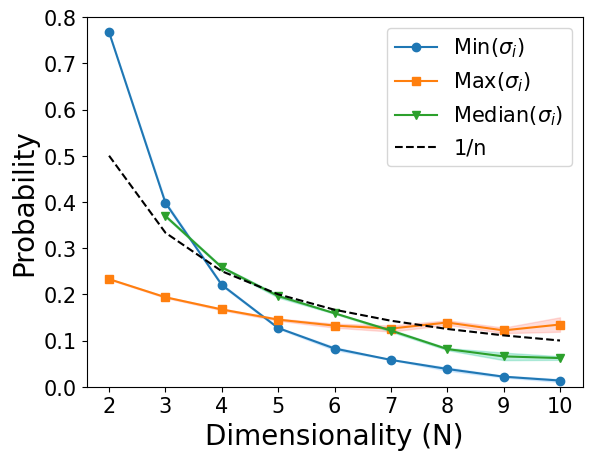

100%|██████████| 9/9 [00:42<00:00,  4.76s/it]


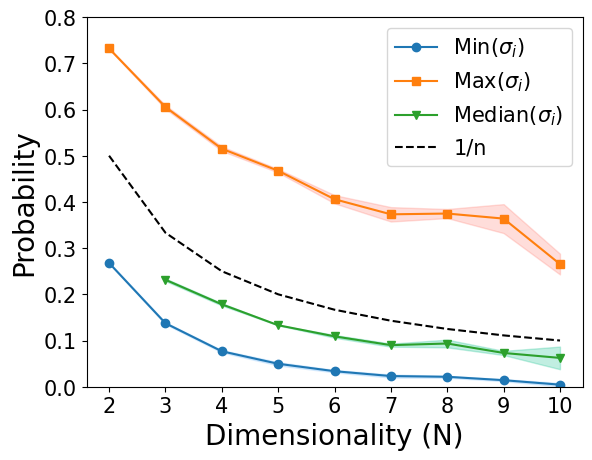

100%|██████████| 9/9 [00:43<00:00,  4.80s/it]


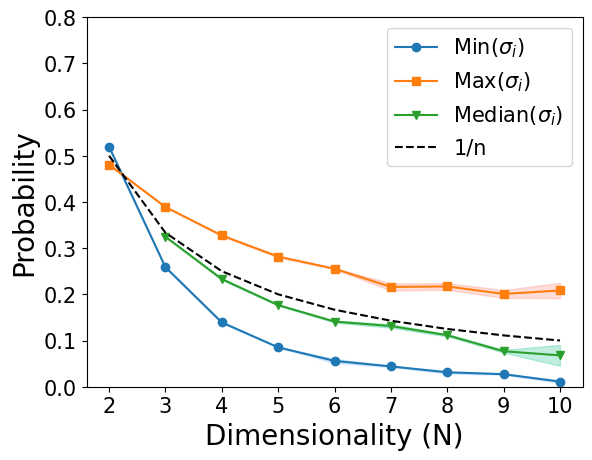

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.style.use('default')
if __name__ == '__main__':
    conds = ['averse','seeking','neutral']
    for cond in conds:
        mean_large = []
        mean_small = []
        mean_mid = []
        std_large = []
        std_small = []
        std_mid = []

        for dim in tqdm(range(2,11)):
            p_large = []
            p_small = []
            p_normal = []
            for t in range(3):
                path = f'./saved/analysed_{dim}D_'+cond+'_dimension'
                if t > 0:
                    path += f'{t+1}'

                Data = pd.read_csv(path)
                Data = Data[Data['trial']>dim*5]
                Data_large = Data.copy()
                Data_small = Data.copy()
                for i in range(1,dim):
                    Data_large = Data_large[abs(Data_large[f'Q{0}'] - Data_large[f'Q{i}'] ) < 0.2]

                ratio_large = len(Data_large[Data_large['choice']==0]) / len(Data_large)
                # print(len(Data_large))
                for i in range(0,dim-1):
                    Data_small = Data_small[abs(Data_small[f'Q{dim-1}'] - Data_small[f'Q{i}']) < 0.2]
                ratio_small = len(Data_small[Data_small['choice']==dim-1]) / len(Data_small)
                # print(len(Data_small))

                Data_normal = Data.copy()
                for i in range(0,dim):
                    if i != dim-2:
                        Data_normal = Data_normal[abs(Data_normal[f'Q{dim-2}'] - Data_normal[f'Q{i}']) < 0.2]
                ratio_normal = len(Data_normal[Data_normal['choice']==dim-2]) / len(Data_normal)
                # print(len(Data_normal))
                p_normal.append(ratio_normal)
                p_large.append(ratio_large)
                p_small.append(ratio_small)
            mean_large.append(np.mean(p_large))
            mean_mid.append(np.mean(p_normal))
            mean_small.append(np.mean(p_small))
            std_large.append(np.std(p_large))
            std_mid.append(np.std(p_normal))
            std_small.append(np.std(p_small))
        total_n = 3
        mean_small = np.array(mean_small)
        mean_large = np.array(mean_large)
        mean_mid = np.array(mean_mid)
        std_small = np.array(std_small)
        std_large = np.array(std_large)
        std_mid = np.array(std_mid)

        plt.plot(np.arange(2, 11, 1), mean_small, label=f'Min($\sigma_i$)', marker='o', linestyle='-')
        plt.plot(np.arange(2, 11, 1), mean_large, label=f'Max($\sigma_i$)', marker='s', linestyle='-')
        plt.plot(np.arange(3, 11, 1), mean_mid[1:], label=f'Median($\sigma_i$)', marker='v', linestyle='-')

        plt.fill_between(np.arange(2,11,1),mean_large[:]+std_large[:]/np.sqrt(total_n),mean_large[:]-std_large[:]/np.sqrt(total_n),color='#ff796c',alpha=0.25)
        plt.fill_between(np.arange(3, 11, 1), mean_mid[1:] + std_mid[1:]/np.sqrt(total_n), mean_mid[1:] - std_mid[1:]/np.sqrt(total_n), color='#08bf89', alpha=0.25)
        plt.fill_between(np.arange(2, 11, 1), mean_small[:] + std_small[:]/np.sqrt(total_n), mean_small[:] - std_small[:]/np.sqrt(total_n), color='#75bbfd', alpha=0.25)
        plt.plot(np.arange(2,11,1), [1/2,1/3,1/4,1/5,1/6,1/7,1/8,1/9,1/10],linestyle='--',color='black',label='1/n')
        plt.legend(prop={'size': 15})
        plt.xticks(size=15)
        plt.yticks(size=15)
        plt.xlabel('Dimensionality (N)', size=20)
        plt.ylabel('Probability', size=20)
        plt.ylim(0,0.8)
        plt.show()
